In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

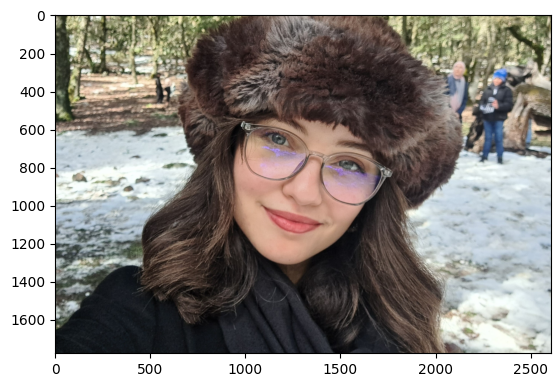

In [ ]:
filename = "Ines Mastouri.jpg"
img = read_file(filename)

In [ ]:
#Create edge Mask
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

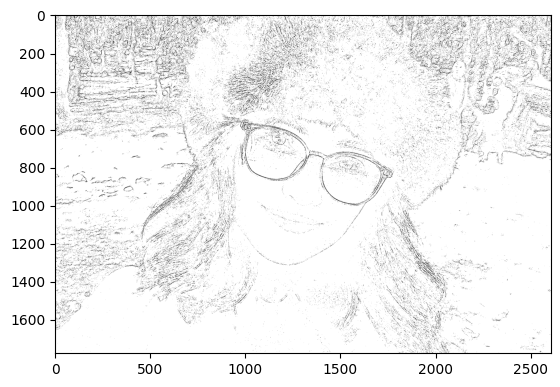

In [ ]:
line_size, blur_value = 3,3
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap ="gray")
plt.show()


In [ ]:
def color_quantization(img, k=2):
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Fix the typo in the next line
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result


In [ ]:
img_quantized = color_quantization(img, k=20)

plt.imshow(img_quantized)
plt.show()

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_quantized, cv2.COLOR_BGR2RGB)), plt.title('Quantized Image')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#Reducing noise

blurred = cv2.bilateralFilter(img, d =50, sigmaColor=300, sigmaSpace=300)
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(blurred), plt.title('Blurred Image')
plt.show()

In [ ]:
#we will combine edge mask with the quantize img

def cartoon():
    c =cv2.bitwise_and(img_quantized, img_quantized, mask=edges)
    plt.imshow(c)
    plt.show()
    

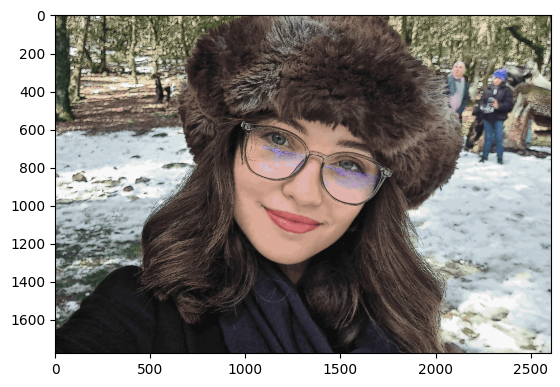

In [ ]:
cartoon()

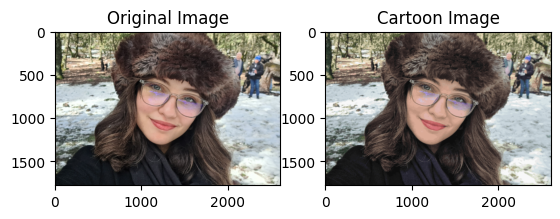

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(img_quantized), plt.title('Cartoon Image')
plt.show()